## Project description

This is a exercise on kaggle knowledge, our goal is trying to predict the survived or not. Features, 
such as Pclass,'sex','fare' are examined.Name column is preprocessed with string function,generated
with a title column as a predicting feature.
Classifer of Naievebayes,adaboost,randoforest has been applied to predict and validated by the corresponding
datasets, then grid serach has been applied to ahead best performer



## import modules

In [314]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from visuals import evaluate
from IPython.display import display
sns.set(style="whitegrid")
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint as sp_randint
import featuretools as ft

from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from  sklearn.ensemble  import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier



## load data

In [2]:
with ZipFile('titanic.zip','r') as titanic:
    titanic.extractall()
    titanic.close()

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 with intuition and general knowledege inspect pclass, sex, age with relationship of surivial rate

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1562]:
train_df.describe()  #Age has 177 of missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## explore the relation between survived rate vs columns

In [1563]:
train_df.corr() # Pclass and Fare have a high correlation coefficient to survived rate, 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass,Class 1 have a higher survived rate,class 3 gives a smaller survived rate

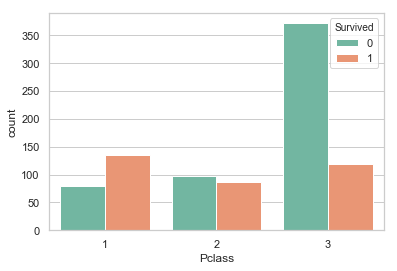

In [1564]:
ax1 = sns.countplot(x = 'Pclass',hue = 'Survived',data = train_df ,palette="Set2")

- fare, Spending more,higher survived rate( which is correlated to the pclass,according to general knowledge)

D:\Program Files (x86)\conda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Program Files (x86)\conda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


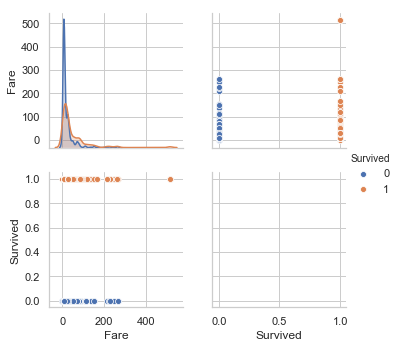

In [1565]:
sns.pairplot(hue = 'Survived',data = train_df[['Fare','Survived']]) 

- categorical data,sex, femal have a much better chance to be survived

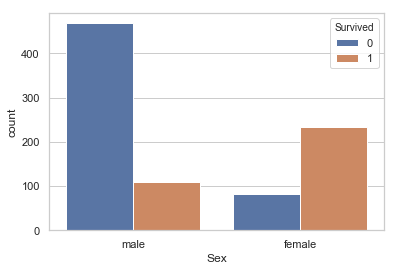

In [1566]:
ax2 = sns.countplot(x = 'Sex',hue = 'Survived',data = train_df)

In [1567]:
ticket_df = train_df.groupby('Ticket').agg({'Ticket':'count','Fare':'mean'})

In [1568]:
## Age

In [1569]:
train_df[train_df['Age'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [1570]:
train_df['Age'].fillna(100,inplace = True)
bins = [0,16,30,45,81,101]
train_df['Age'] = pd.cut(train_df['Age'],bins)

In [1571]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(16, 30]",1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(30, 45]",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(16, 30]",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(30, 45]",1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,"(30, 45]",0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,"(81, 101]",0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,"(45, 81]",0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,"(0, 16]",3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,"(16, 30]",0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,"(0, 16]",1,0,237736,30.0708,NaN,C


In [1572]:
df_age = pd.get_dummies(age_cut)


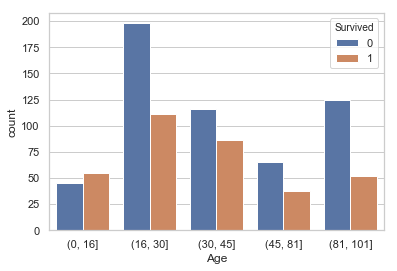

In [1573]:
sns.countplot(x = 'Age',hue = 'Survived',data =train_df )

## name, which has a indication for sex and age,such as master, miss

- Preprocess name column to generate a title column

In [6]:
def split_name(df,col_name,new_name):
    
    miss_ = ['Mlle','Ms','Mme','Lady','theCountess','Dona']
    mr_ = ['Don','Rev','Col','Major','Jonkheer','Sir','Capt','Dr']
    
#     extract out title frome col_name
    split_arr = df[col_name].str.split(',')
    result = []
    for i in range(len(split_arr)):
         result.append(split_arr[i][1].split('.')[0].replace(' ',''))
#     group the new titles
    for i in range(len(result)):
        if result[i]  in miss_:
            result[i] = 'Miss'
        elif result[i] in mr_:
            result[i] = 'Mr'
    
    df[new_name] = result
    
    return df

In [7]:
df_split = split_name(train_df,'Name','Title')

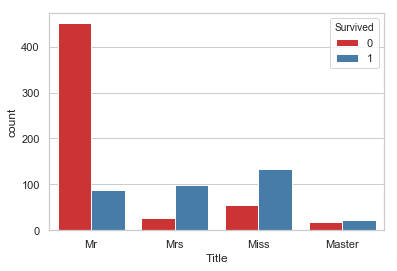

In [8]:
ax2 = sns.countplot(x = 'Title',hue = 'Survived',data = train_df,palette="Set1")

In [9]:
df_split[df_split['Title'] == 'Master'] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,Master


In [10]:
### sibsp and asp grouped together

In [11]:
df_split['Family_size'] = df_split['SibSp'] + df_split['Parch']

In [12]:
df_family_master = df_split[df_split['Title'] == 'Master'][['Survived','Family_size']]

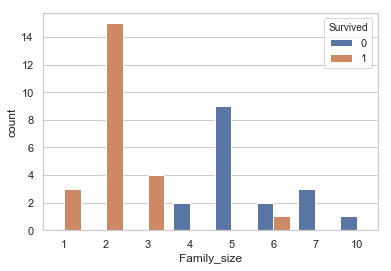

In [13]:
sns.countplot(x = 'Family_size',hue = 'Survived',data =df_family_master ) 
## based on the observation , how many people travelled with master is a fatore to predict

In [14]:
len(df_split)

891

In [15]:
df_split.groupby(['Pclass','Sex']).agg({'Survived':'sum'})

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [16]:
df_sex = df_split[df_split['Sex']=='female'][df_split[df_split['Sex']=='female']['Survived'] == 0]

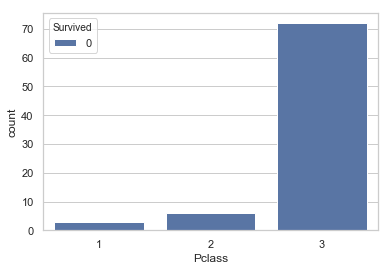

In [17]:
sns.countplot(x = 'Pclass',hue = 'Survived',data = df_sex  ) 

## High related fetures to lable 'survived'
- Pclass,Fare(correlated of those two)
- Sex,Title
- select features to feed to algorithm(Pcalss,Sex, Title)
- add new feature,per spare for travelling group(fare/people who travelled together)

In [18]:
# def cal_per_fare(df):
    
#     per_spare = {}
    
#     for i in range(len(df)):
        
#         if df['SibSp'][i] ==  0 and df['Parch'][i]==  0:
#             per_spare[i] = df['Fare'][i]
#         else:
#             per_spare[i] = df['Fare'][i] / (df['SibSp'][i] + df['Parch'][i]+1)
            
#     per_spare_df = pd.DataFrame(list(per_spare.items()),columns = ['index','per_spare'],index = list(per_spare.keys()))
# #     per_spare_df.reset_index(inplace =True)
#     per_spare_df.set_index('index',inplace = True)
    
#     return per_spare_df


In [276]:

def preprocess(df,features_col):
    ''' function to preprocess input dataframe, returns cleaned dataframe for training
    input,datafraem
    
    actions have been taken,
    genreating new feature,'per_spare',and buketlize  it
    getting dummy variable for 'Pclass',
    mapping set to 0 and 1
    generating new feature,title and have it dummirized
    
    output, cleaned dataframe
    '''
    scaler = MinMaxScaler()
    
    preprocessed_df = df[features_col].copy()
    #feature column preprocessing
    preprocessed_df = split_name(preprocessed_df,'Name','Title')
#     preprocessed_df['Sex'] = preprocessed_df['Sex'].map({'female':0,'male':1})
    preprocessed_df['Age'] = preprocessed_df['Age'].fillna(100)
    preprocessed_df['Family_size'] = preprocessed_df['SibSp'] + preprocessed_df['Parch']
    #one hot encoidng Age and Title columns
    titles = pd.get_dummies(preprocessed_df['Title'],prefix = 'title')
    bins = [0,16,30,45,81,101]
    preprocessed_df['Age'] = pd.cut(preprocessed_df['Age'],bins)
    ages = pd.get_dummies(preprocessed_df[['Age']],prefix = 'age')
    # Merge onehot encoding df with orginal one
    preprocessed_df = pd.merge(preprocessed_df,titles,left_index =True,right_index =True)
    preprocessed_df = pd.merge(preprocessed_df,ages,left_index =True,right_index =True)
    #scaling family_size and pclass
#     preprocessed_df['Family_size'] = scaler.fit_transform(preprocessed_df[['Family_size'] ])
#     preprocessed_df['Pclass'] = scaler.fit_transform(preprocessed_df[['Pclass']] )
#     preprocessed_df['Pclass_fam'] = preprocessed_df['Pclass'] + preprocessed_df['Family_size']
    #drop repeat columns
    preprocessed_df.drop(['SibSp','Parch','Age','Name','Title'],axis = 1,inplace =True)
    # deal with column names with , and []
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    preprocessed_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in preprocessed_df.columns.values]

    # Featrue engineering for selected ones
#     print(preprocessed_df.head())
    return preprocessed_df

## perform data cleaning

In [277]:
train_df = pd.read_csv('train.csv')
feature_cols = ['Pclass','SibSp','Parch','Age','Name']
X = preprocess(train_df,feature_cols)

In [278]:
y = train_df['Survived']

In [279]:
X

,Pclass,Family_size,title_Master,title_Miss,title_Mr,title_Mrs,"age_(0, 16_","age_(16, 30_","age_(30, 45_","age_(45, 81_","age_(81, 101_"
0,3,1,0,0,1,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,1,0,0
2,3,0,0,1,0,0,0,1,0,0,0
3,1,1,0,0,0,1,0,0,1,0,0
4,3,0,0,0,1,0,0,0,1,0,0
5,3,0,0,0,1,0,0,0,0,0,1
6,1,0,0,0,1,0,0,0,0,1,0
7,3,4,1,0,0,0,1,0,0,0,0
8,3,2,0,0,0,1,0,1,0,0,0
9,2,1,0,0,0,1,1,0,0,0,0


In [97]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

##  split dataset as train and valiation

In [280]:
X_train, X_valid, y_train,y_valid = train_test_split(X,y,test_size = 0.7,random_state = 42,stratify = y)


In [281]:
sum(y_train ==1) / len(y_train) *100

38.20224719101123

In [282]:
sum(y_valid ==1) / len(y_valid) *100

38.46153846153847

##  Evaluating Model Performance

In this case, model is capable to predict the one survied or not is equally important, then we use **accuracy for** evaluating the model, but ture positive and true negative is imporant.

## Naieve model

In [283]:
# we can have a naive model to predict all the passengers will survived.
TP = np.sum(y)
FP = len(y) - TP

TN = 0
FN = 0

#  Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP+FP+TN +FN )
# accuracy
recall = TP / (TP + FN)
precision = TP/(TP + FP)

# # Calculate F-score using the formula above for beta = 1 and correct values for precision and recall.
fscore = (1+1**2)*(precision * recall  / (1**2*precision + recall))

# # Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3838, F-score: 0.5547]



## Training Function

In [284]:
def train_and_validation(learner,x_train,y_train,x_valid,y_valid):

    '''
    inputs:
    - learner: the learning algorithm to be trained and predicted on
    - X_train: features training set
    - y_train: survived training set
    - X_valid: features testing set
    - y_valid: survived testing set
    '''
    result = {}
    learner.fit(x_train,y_train)

    #     get the prediction on validation and train datasets
    pred_valid = learner.predict(x_valid)
    pred_train = learner.predict(x_train)
    
#     result['acc_train'] = accuracy_score(y_true = y_train,y_pred = pred_train)
#     print('train accuracy score',result['acc_train'] )
    result['acc_valid'] = accuracy_score(y_true = y_valid,y_pred = pred_valid)
    print('accuracy score',accuracy_score(y_true = y_valid,y_pred = pred_valid))
#     result['f_valid'] = fbeta_score(y_true = y_valid,y_pred = pred_valid,beta = 1)

    print("{} trained on .".format(learner.__class__.__name__))
    return result
    

## Implement training

In [285]:
def train_initiate(X_train, y_train, X_valid, y_valid):
    classiers = [GaussianNB(),AdaBoostClassifier(random_state = 42),RandomForestClassifier(random_state = 42),GradientBoostingClassifier(),
                XGBClassifier()]
    results = {}
    for clf in classiers:
        clf_name = clf.__class__.__name__
        results[clf_name] = train_and_validation(clf,  X_train, y_train, X_valid, y_valid)
#     results[clf_name] = train_and_validation(clf,  X,y)
    return results
# Run metrics visualization for the three supervised learning models chosen


In [286]:
results = train_initiate(X_train, y_train, X_valid, y_valid)

accuracy score 0.7980769230769231
GaussianNB trained on .
accuracy score 0.8269230769230769
AdaBoostClassifier trained on .


D:\Program Files (x86)\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score 0.8012820512820513
RandomForestClassifier trained on .
accuracy score 0.8205128205128205
GradientBoostingClassifier trained on .
accuracy score 0.8525641025641025
XGBClassifier trained on .


In [287]:
## EXTRACT FEATURE , TRAINING AND VALIDATING

In [288]:
def featrue_tools_es(df):
    featured_engineering_df = df.copy()
    # create instantce of entity
    es = ft.EntitySet(id="titanic")
    es = es.entity_from_dataframe(entity_id="titanic",
                                dataframe=featured_engineering_df,
                                 index ='PassengerId')
    
    return featured_engineering_df

In [289]:
preprocessed_df = preprocess(train_df,features_col= ['Age','Name','Sex','Pclass','SibSp','Parch','Survived'])
feature_engieerning_df = featrue_tools_es(preprocessed_df)

2019-08-05 19:18:34,154 featuretools.entityset - WARNING    index PassengerId not found in dataframe, creating new integer column


In [399]:
def optimized_model():

    clf = XGBClassifier()
    scorer = make_scorer(accuracy_score)
#     parameters = {'bootstrap': [True, False],
#      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#      'max_features': ['auto', 'sqrt'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10],
#      'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
#     parameters = { 'n_estimators': sp_randint(1, 500) ,'learning_rate': [0.00001,0.0001,0.001,0.01,0.3,0.5,1.0]}
        #random search on adaboost classifier    
#     random_obj = RandomizedSearchCV( clf, param_distributions = parameters, scoring = scorer,cv=5)

    param_grid = {
        'silent': [True,False],
        'max_depth': [2,3,5],
        'learning_rate': [0.001, 0.01, 0.1],
        'subsample': [ 0.2,0.8],
        'colsample_bytree': [0.4, 0.6, 0.8,  1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.10,0.25,0.5,0.75],
        'gamma': [0, 0.01,0.1, 0.5, 1.0],
        'reg_lambda': [0.01,0.1, 0.25,0.5,1.0],
        'n_estimators': [10]}

    fit_params = {'eval_metric': 'mlogloss',
                  'early_stopping_rounds': 10,
                  'eval_set': [(X_valid, y_valid)]}

    random_obj = RandomizedSearchCV(clf, param_grid,
                            n_jobs=1, verbose=2, cv=2,                         
                            scoring=scorer, refit=True)
    random_fit = random_obj.fit(X_train,y_train)
        
    best_random_clf = random_fit.best_estimator_
    random_predictions = (clf.fit(X_train, y_train)).predict(X_valid)
    best_random_predictions = best_random_clf.predict(X_valid)
    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_valid, random_predictions)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_valid, best_random_predictions)))
    if accuracy_score(y_valid, random_predictions) > accuracy_score(y_valid, best_random_predictions):
        best_clf = clf
    else:
        best_clf = best_random_clf      
    return best_clf

In [400]:
best_clf = optimized_model()

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] subsample=0.8, silent=True, reg_lambda=0.01, n_estimators=10, min_child_weight=0.75, max_depth=3, learning_rate=0.01, gamma=0, colsample_bytree=0.4, colsample_bylevel=1.0 
[CV]  subsample=0.8, silent=True, reg_lambda=0.01, n_estimators=10, min_child_weight=0.75, max_depth=3, learning_rate=0.01, gamma=0, colsample_bytree=0.4, colsample_bylevel=1.0, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] subsample=0.8, silent=True, reg_lambda=0.01, n_estimators=10, min_child_weight=0.75, max_depth=3, learning_rate=0.01, gamma=0, colsample_bytree=0.4, colsample_bylevel=1.0 
[CV]  subsample=0.8, silent=True, reg_lambda=0.01, n_estimators=10, min_child_weight=0.75, max_depth=3, learning_rate=0.01, gamma=0, colsample_bytree=0.4, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.2, silent=True, reg_lambda=0.5, n_estimators=10, min_child_weight=0.25, max_depth=5, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=1.0 
[CV]  subsample=0.2, silent=True, reg_lambda=0.5, n_estimators=10, min_child_weight=0.25, max_depth=5, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.2, silent=True, reg_lambda=0.5, n_estimators=10, min_child_weight=0.25, max_depth=5, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=1.0 
[CV]  subsample=0.2, silent=True, reg_lambda=0.5, n_estimators=10, min_child_weight=0

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
D:\Program Files (x86)\conda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8526

Optimized Model
------
Final accuracy score on the testing data: 0.8397


In [385]:
best_clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

##  Predict on test data with Clf_A

In [292]:
test_df = pd.read_csv('test.csv')

In [293]:

X_test = preprocess(test_df,feature_cols)

test_df['Survived'] = best_clf.predict(X_test )

In [296]:
test_df[['PassengerId','Survived']].to_csv('sub01',index = False)

In [297]:
test_df[test_df['Name'].str.contains('M')][test_df['Survived']==1]['Sex'].value_counts()

D:\Program Files (x86)\conda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


female    137
male       16
Name: Sex, dtype: int64